### **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
warnings.filterwarnings('ignore')
import nltk
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Integrating with google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Data Loading**

In [ ]:
header_list = ["ID", "label", "statement","subject","speaker","title of speaker","state","party","barely true","false","half true","mostly true","pants on fire","venue"]

In [ ]:
train_dataset = pd.read_csv("/content/drive/My Drive/MLProject/train.tsv",delimiter='\t',names=header_list)
valid_dataset = pd.read_csv("/content/drive/My Drive/MLProject/valid.tsv",delimiter='\t',names=header_list)
test_dataset = pd.read_csv("/content/drive/My Drive/MLProject/test.tsv",delimiter='\t',names=header_list)

In [ ]:
print(train_dataset.shape)
print(valid_dataset.shape)
print(test_dataset.shape)

(10240, 14)
(1284, 14)
(1267, 14)


In [ ]:
Dataset = pd.concat([train_dataset,valid_dataset,test_dataset], ignore_index=True)


### **Dataset Statistics**

In [ ]:
Dataset.shape

(12791, 14)

In [ ]:
columns = Dataset.columns
columns

Index(['ID', 'label', 'statement', 'subject', 'speaker', 'title of speaker',
       'state', 'party', 'barely true', 'false', 'half true', 'mostly true',
       'pants on fire', 'venue'],
      dtype='object')

In [ ]:
Dataset['label'].value_counts()

half-true      2627
false          2507
mostly-true    2454
barely-true    2103
true           2053
pants-fire     1047
Name: label, dtype: int64

### **Data Preprocessing**

In [ ]:
Dataset["label"].replace({"half-true": "0", "mostly-true": "0","barely-true":"1","pants-fire":"1","false":"1","true":"0"}, inplace=True)


In [ ]:
Dataset.head(10)

,ID,label,statement,subject,speaker,title of speaker,state,party,barely true,false,half true,mostly true,pants on fire,venue
0,2635.json,1,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,1,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,0,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,0,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,1,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,0,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,0,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,0,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [ ]:
new_Dataset = Dataset[['statement','label']]

In [ ]:
new_Dataset.head()

,statement,label
0,Says the Annies List political group supports ...,1
1,When did the decline of coal start? It started...,0
2,"Hillary Clinton agrees with John McCain ""by vo...",0
3,Health care reform legislation is likely to ma...,1
4,The economic turnaround started at the end of ...,0


In [ ]:
new_Dataset.isnull().sum()

statement    0
label        0
dtype: int64

In [ ]:
new_Dataset['label'].value_counts()

0    7134
1    5657
Name: label, dtype: int64

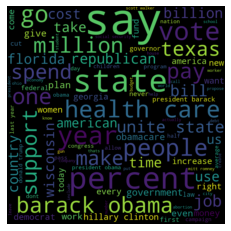

In [ ]:
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=200,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(new_Dataset['statement']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### **Removing Stopwords and Lemmatization**

In [ ]:
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In [ ]:
for i in range(new_Dataset.shape[0]):
    new_Dataset['statement'][i] = re.sub('[^A-Za-z ]+', '',new_Dataset['statement'][i])
    words = word_tokenize(new_Dataset['statement'][i])
    words = [wordnet_lemmatizer.lemmatize(word.lower(), pos='v') for word in words if word not in set(stopwords.words('english'))]
    new_Dataset['statement'][i] = ' '.join(words)


In [ ]:
new_Dataset['statement'][2]

'hillary clinton agree john mccain vote give george bush benefit doubt iran'

### **TFid**

In [ ]:
tfid = TfidfVectorizer(strip_accents=None,
                      lowercase=False,
                      preprocessor=None,
                      max_features=13000,
                      use_idf=True,
                      smooth_idf=True)
X = tfid.fit_transform(new_Dataset['statement']).toarray()
y = new_Dataset.label.values

In [ ]:
df = pd.DataFrame(X, columns=tfid.get_feature_names())
df.head(30)

,aa,aaa,aaron,aarp,abandon,abas,abbas,abbott,abc,abcs,abdul,abedin,abele,abercrombie,abet,abide,abilities,ability,abill,abillion,abject,able,ablebodied,aboard,abolish,abolition,abort,abortion,abortionabortioncarlyfiorinacaliforniarepublicanthe,abortioneven,abortioninducing,abortionists,abortions,abortionsabortionronaldrenuartstate,about,above,abraham,abrahamlincoln,abramoff,abramoffs,...,youll,young,younger,youngsters,youngstown,your,youre,youth,youthpass,youths,youtube,youve,yrs,yucca,yulin,yuma,yuppies,yuri,zack,zandi,zanesville,zappala,zawahiri,zeldin,zell,zenzinger,zephyr,zero,zika,zimmerman,zinn,zip,zippo,zombie,zombies,zone,zoo,zuckerberg,zuckerbergs,zvisa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### **Training and Testing**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3, shuffle=True)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [ ]:
clf.score(X_test, y_test) * 100

61.54247003647734

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
a = pd.Series(y_test)
a.value_counts()

0    2127
1    1711
dtype: int64

### **Generating Confusion matrix**

*Logistic Regression*

In [ ]:
from sklearn import metrics
CM = metrics.confusion_matrix(y_test, y_pred)
print(CM)

[[1636  491]
 [ 985  726]]


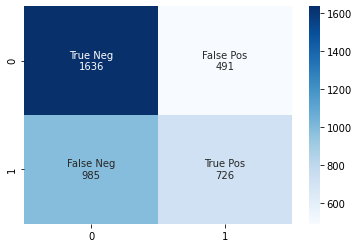

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM, annot=labels, fmt='', cmap='Blues')

 the count of true negatives is C(0,0), false negatives is C(1,0) , true positives is C(1,1) and false positives is C(0,1).

1. TP = We predicted news is Fake and actually the news is Fake
2. TN = We predicted news is True and actually the news is True
3. FP = We predicted news is Fake, but actually the news is True
4. FN = We predicted news is True, but actually the news is Fake


In [ ]:
cm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.76915844, 0.42431327])

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
clf_gini = DecisionTreeClassifier(criterion = "gini") 
  
# Performing training 
clf_gini.fit(X_train, y_train) 
y_pred = clf_gini.predict(X_test)
print(accuracy_score(y_test,y_pred))
CM_Dt = metrics.confusion_matrix(y_test, y_pred)
    

0.5646169880145909


In [ ]:
cm_dt = CM_Dt.astype('float') / CM_Dt.sum(axis=1)[:, np.newaxis]
cm_dt.diagonal()

array([0.62341326, 0.49152542])

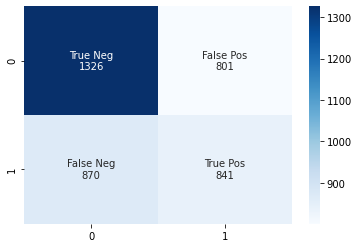

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_Dt.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_Dt, annot=labels, fmt='', cmap='Blues')

*KNN*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
  
knn = KNeighborsClassifier(n_neighbors=60,weights='distance') 

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
CM_knn = metrics.confusion_matrix(y_test, y_pred)


0.6021365294424179


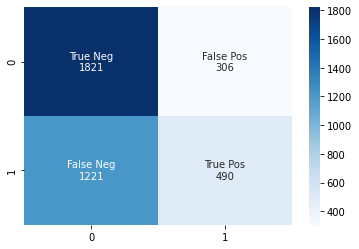

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_knn.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_knn, annot=labels, fmt='', cmap='Blues')

In [ ]:
cm_knn = CM_knn.astype('float') / CM_knn.sum(axis=1)[:, np.newaxis]
cm_knn.diagonal()

array([0.8561354 , 0.28638223])

*SVC*

In [ ]:
# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 

# fitting x samples and y classes 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) 
print(accuracy_score(y_test,y_pred))
CM_svm = metrics.confusion_matrix(y_test, y_pred)

0.6089108910891089


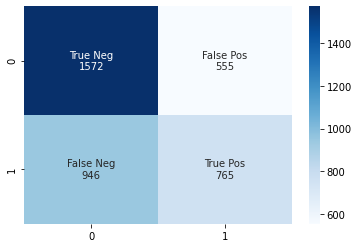

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in CM_svm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(labels,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(CM_svm, annot=labels, fmt='', cmap='Blues')

In [ ]:
cm_svc = CM_svm.astype('float') / CM_svm.sum(axis=1)[:, np.newaxis]
cm_svc.diagonal()

array([0.73906911, 0.44710695])